<a href="https://colab.research.google.com/github/JuaniRain/Segundaentrega/blob/main/SegundaEntrega_JuanRainoldi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py) ... done


In [ ]:
# Importar librerías

# Operaciones básicas
import pandas as pd
import pandas_profiling
import numpy as np

# Visualizacion de Datos
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Librerías de estadística
from scipy.stats import skew #para coeficienrte de Fisher

##Se carga el data set

In [ ]:
creditos=pd.read_csv('https://raw.githubusercontent.com/JuaniRain/Base-datos-Coder/main/test.csv')
print(creditos.shape)
display(creditos.head())

(50000, 27)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


##Detalle de cada columna
ID: Representa el número de identificación de una entrada

Customer_ID: Representa el código único de identificación de cada cliente

Month: Represente el mes del año

Name: Representa el nombre del cliente

Age: Representa la edad del cliente

SSN: Representa el número de seguridad social de cada cliente

Occupation: Representa la profesión del cliente

Annual_Income: Representa el ingreso anual del cliente

Monthly_Inhand_Salary: Representa el ingreso mensual del cliente

Num_Bank_Accounts: Representa el número de cuentas bancarias que tiene el cliente

Num_Credit_Card: Representa el número de tarjetas de créditos que tiene el cliente

Interest_Rate: Representa la tasa de interés de la tarjeta de crédito

Num_of_Loan: Representa el número de prestamos tomados del banco

Type_of_Loan: Representa el tipo de préstamo tomado por cliente

Delay_from_due_date: Representa el número promedio de días de retraso desde la fecha de pago

Num_of_Delayed_Payment: Representa el número promedio de pagos demorado por cliente

Changed_Credit_Limit: Representa el cambio porcentual en el límite de la tarjeta de crédito

Num_Credit_Inquiries: Representa el número de consultas de tarjetas de créditos

Credit_Mix: Representa la clasificación de la mezcla de créditos

Outstanding_Debt: Representa la deuda restante por pagar (en USD)

Credit_Utilization_Ratio: Representa el índice de la utilización de la tarjeta de crédito.

Credit_History_Age: Representa la historia de créditos en años de la persona

Payment_of_Min_Amount: Representa si la persona realizó el pago del monto mínimo. Donde Yes significa que ha realizado el pago mínimo, No significa que no ha realizado el pago del monto mínimo y NM significa que no hay un monto mínimo para ese periodo.

Total_EMI_per_month: Representa los pagos mensuales del EMI (en USD)

Amount_invested_monthly: Representa el monto mensual invertido del cliente (en USD)

Payment_Behaviour: Representa el comportamiento de pago de los clientes

Monthly_Balance: Representa el saldo mensual del cliente (en USD)


##Se crea un data set con los datos originales y otro en el cual se irán trabajando. De esta forma el docente podrá ver que es lo que se ha realizado.

In [ ]:
BaseDO=creditos

##Se eliminan las columnas que ya se sabe que no se van a utilizar.

Estas son el 'ID' del registro, El mes del registro, el nombre del cliente, el número del SSN y tipo de prestamo. Se eliminan ya que se considera que no proporcionan información relevante para el modelo.

In [ ]:
creditos.drop(['ID','Month','Name','SSN','Type_of_Loan'],axis=1,inplace=True)

##Se eliminan los valores duplicados

In [ ]:
print(creditos.shape)
creditos= creditos.drop_duplicates(keep='last')
print(creditos.shape)

(50000, 22)
(50000, 22)


##Se chequea el tipo de dato y cuantos datos nulos posee cada columna.

In [ ]:
print(creditos.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               50000 non-null  object 
 1   Age                       50000 non-null  object 
 2   Occupation                50000 non-null  object 
 3   Annual_Income             50000 non-null  object 
 4   Monthly_Inhand_Salary     42502 non-null  float64
 5   Num_Bank_Accounts         50000 non-null  int64  
 6   Num_Credit_Card           50000 non-null  int64  
 7   Interest_Rate             50000 non-null  int64  
 8   Num_of_Loan               50000 non-null  object 
 9   Delay_from_due_date       50000 non-null  int64  
 10  Num_of_Delayed_Payment    46502 non-null  object 
 11  Changed_Credit_Limit      50000 non-null  object 
 12  Num_Credit_Inquiries      48965 non-null  float64
 13  Credit_Mix                50000 non-null  object 
 14  Outsta

##Se muestra cuantos valores nulos posee cada columna

In [ ]:
# Columnas con porcentaje de nulos
pd.set_option('display.max_rows', None)
serie=(creditos.isnull().sum()/creditos.shape[0])*100
serie=serie.sort_values(ascending=False)
serie= serie[serie>0]
serie

Monthly_Inhand_Salary      14.996
Credit_History_Age          8.940
Num_of_Delayed_Payment      6.996
Amount_invested_monthly     4.542
Num_Credit_Inquiries        2.070
Monthly_Balance             1.124
dtype: float64

##Se ve que datos y cuantas veces se repiten en cada campo.

In [ ]:
c1='Customer_ID'
c2='Age'
c3='Occupation'
c4='Annual_Income'
c5='Monthly_Inhand_Salary'
c6='Num_Bank_Accounts'
c7='Num_Credit_Card'
c8='Interest_Rate'
c9='Num_of_Loan'
c10='Delay_from_due_date'
c11='Num_of_Delayed_Payment'
c12='Changed_Credit_Limit'
c13='Num_Credit_Inquiries'
c14='Outstanding_Debt'
c15='Credit_Utilization_Ratio'
c16='Credit_History_Age'
c17='Payment_of_Min_Amount'
c18='Amount_invested_monthly'
c19='Payment_Behaviour'
c20='Monthly_Balance'
c21='Credit_Mix'

def valcolum(x):
  print(creditos[x].value_counts())

valcolum(c17)

Yes    26158
No     17849
NM      5993
Name: Payment_of_Min_Amount, dtype: int64


##Se crean dos campos nuevos 'Años' y 'Meses' en base de la columna 'Credit_History_Age'

In [ ]:
# Se usa str.split() para dividir los datos y expandir en nuevas columnas
creditos[['Años', 'Meses']] = creditos['Credit_History_Age'].str.split('and', expand=True)

# Se elimina la columna "Credit_History_Age"
creditos.drop('Credit_History_Age', axis=1, inplace=True)

##Se cambia el tipo de dato de algunos campos para poder realizar la operación replace y así eliminar caracteres erroneos.

In [ ]:
#Se convierten los tipos de dato a str para poder reemplazar los - y _

#Se crea una lista con las columnas a cambiar el tipo de dato
aconvertir=['Age','Occupation','Annual_Income','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit','Outstanding_Debt','Payment_Behaviour']

#Se realiza la conversión a datos srt
creditos[aconvertir]=creditos[aconvertir].astype(str)

##Se procede a eliminar los caracteres erróneos

In [ ]:
#se agrega a la lista 'aconvertir' el campo 'Credit_Mix'
aconvertir.append('Credit_Mix')

#Se eliminan los - y _ de las columnas
creditos[aconvertir]=creditos[aconvertir].apply(lambda x: x.str.replace('_', '').str.replace('-', ''))

#Se eliminan los !@9#%8
creditos['Payment_Behaviour']=creditos['Payment_Behaviour'].str.replace('!@9#%8','').str.replace('_',' ')

#Se eliminan los ' Years'
creditos['Años']=creditos['Años'].str.replace(' Years','')

#Se eliminan los ' Months'
creditos['Meses']=creditos['Meses'].str.replace(' Months','')

##Luego de eliminarse los caracteres erroneos, se convierten los campos al tipo correspondiente.

In [ ]:
#Se crea una lista para los valores que serán texto y otra para los valores que serán numéricos
covnume=['Age','Annual_Income','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit','Outstanding_Debt','Amount_invested_monthly','Monthly_Balance',
         'Años','Meses'] #númerico
convtex=['Occupation','Payment_Behaviour'] #texto

#Se realiza la conversión
creditos[convtex]=creditos[convtex].astype(str)
for i in covnume:
  creditos[i] = pd.to_numeric(creditos[i], errors='coerce')

In [ ]:
# Se usa str.split() para dividir los datos y expandir en nuevas columnas
creditos['Historial_crediticio_meses'] = 12*creditos['Años']+creditos['Meses']

# Eliminar la columna "Credit_History_Age" si ya no se necesita
creditos.drop(['Años', 'Meses'], axis=1, inplace=True)

##Se reemplazan los valores vacíos por "nan".

In [ ]:
#Se crea lista con las columnas en las cuales se va a trabajar
aconvertir=['Age','Occupation','Annual_Income','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit','Outstanding_Debt','Credit_Mix','Payment_Behaviour',
            'Payment_of_Min_Amount']

#Se utilizá ciclo for para reemplazar los valores en blancos por NAN
for i in aconvertir:
  creditos.loc[creditos[i]=='',i]=pd.np.nan

<ipython-input-85-535629682305>:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  creditos.loc[creditos[i]=='',i]=pd.np.nan


##Se chequea estadísticas descriptibas de las columnas con datos numéricos.

In [ ]:
print(creditos.describe().T)

                              count           mean           std          min  \
Age                         50000.0     118.994420  6.781333e+02    14.000000   
Annual_Income               50000.0  166334.204997  1.351965e+06  7005.930000   
Monthly_Inhand_Salary       42502.0    4182.004291  3.174109e+03   303.645417   
Num_Bank_Accounts           50000.0      16.838260  1.163968e+02    -1.000000   
Num_Credit_Card             50000.0      22.921480  1.293148e+02     0.000000   
Interest_Rate               50000.0      68.772640  4.516024e+02     1.000000   
Num_of_Loan                 50000.0      11.299360  6.548350e+01     0.000000   
Delay_from_due_date         50000.0      21.052640  1.486040e+01    -5.000000   
Num_of_Delayed_Payment      46502.0      30.910369  2.215075e+02     0.000000   
Changed_Credit_Limit        48941.0      10.458053  6.651572e+00     0.000000   
Num_Credit_Inquiries        48965.0      30.080200  1.969841e+02     0.000000   
Outstanding_Debt            

##Se crea función para realizar grafico de caja (boxplot) y así poder chequear la distribución de los valores de cada una de las columnas numéricas.

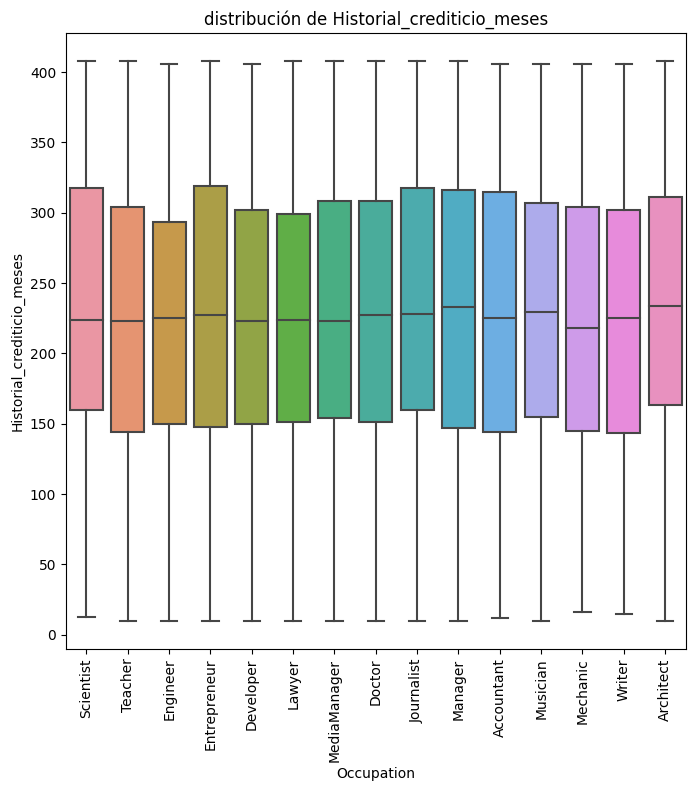

In [ ]:
fig, ax=plt.subplots(figsize=(8,8))


c1='Age'
c2='Annual_Income'
c3='Monthly_Inhand_Salary'
c4='Num_Bank_Accounts'
c5='Num_Credit_Card'
c6='Interest_Rate'
c7='Num_of_Loan'
c8='Delay_from_due_date'
c9='Num_of_Delayed_Payment'
c10='Changed_Credit_Limit'
c11='Num_Credit_Inquiries'
c12='Outstanding_Debt'
c13='Credit_Utilization_Ratio'
c14='Total_EMI_per_month'
c15='Amount_invested_monthly'
c16='Monthly_Balance'
c17='Historial_crediticio_meses'

def graf(columna):
  sns.boxplot(x='Occupation', y = columna, data = creditos)
  plt.xticks(rotation=90)
  plt.title("distribución de "+columna)

graf(c17)

##Se eliminan los registros que se consideran erróneos:

-Edades mayores a 99 años

-Clientes que hayan tomado más de 20 prestamos

-El número de pagos retrasados sea mayor a 99

-El número de tarjetas de crédito sea mayor a 20

-El número de cuentas bancarias sea mayor a 20 o negativas

-La tasa de interés sea mayor a 99

-Los pagos mensuales del EMI sean mayores a 2000 o iguales a 0

-Los número de consultas de tarjetas de créditos sean mayores a 99

In [ ]:
#Se crea lista de los campos en los cuales se eliminarán los registros mayores a 99
list99=['Age','Num_of_Delayed_Payment','Interest_Rate','Num_Credit_Inquiries']

#Se eliminan registros erroneos
for i in list99:
  creditos.loc[creditos[i]>99 ,i]=pd.np.nan

creditos.loc[creditos['Num_of_Loan']>20 ,'Num_of_Loan']=pd.np.nan
creditos.loc[creditos['Num_Credit_Card']>20 ,'Num_Credit_Card']=pd.np.nan
creditos.loc[creditos['Num_Bank_Accounts']>20 ,'Num_Bank_Accounts']=pd.np.nan
creditos.loc[creditos['Total_EMI_per_month']>2000 ,'Total_EMI_per_month']=pd.np.nan
creditos.loc[creditos['Total_EMI_per_month']==0 ,'Total_EMI_per_month']=pd.np.nan
creditos.loc[creditos['Num_Bank_Accounts']<0 ,'Num_Bank_Accounts']=pd.np.nan

<ipython-input-88-af3776397675>:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  creditos.loc[creditos[i]>99 ,i]=pd.np.nan
<ipython-input-88-af3776397675>:8: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  creditos.loc[creditos['Num_of_Loan']>20 ,'Num_of_Loan']=pd.np.nan
<ipython-input-88-af3776397675>:9: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  creditos.loc[creditos['Num_Credit_Card']>20 ,'Num_Credit_Card']=pd.np.nan
<ipython-input-88-af3776397675>:10: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  creditos.loc[creditos['Num_Bank_Accounts']>20 ,'Num_Bank_Accounts']=pd.np.nan
<ipython-input-88-af3776397675>:11: FutureWarning: The 

#En el caso de los ingresos mensuales mayores a 250000 USA se modificaran a 250000 USA.

In [ ]:
creditos.loc[creditos['Annual_Income']>250000,['Annual_Income']]=250000

##Una vez eliminados los valores erróneos:

---


Se procede a rellenar o eliminar los registros vacíos, optando por completar con la moda en algunos campos, en otros campos se opto por realizar una interpolación lineal y en otros se emplea aplicar el valor más cercano (algunos de los campos a los que se aplico interpolación lineal, luego se completo valor más cercano para dichos valores que no se pudo realizar la interpolación). En el caso del "Credit_Mix" se opto por eliminar las filas donde estos se encontraran vacíos, ya que es el dato etiqueta del modelo.

In [ ]:
#Se crean lista con los campos a los cuales se les aplicará interpolación líneal, a cuales se les aplicará el valor más cercano y a cuales se eliminaran.
listintlin=['Monthly_Inhand_Salary','Interest_Rate','Num_of_Loan','Num_of_Delayed_Payment','Num_Credit_Card','Total_EMI_per_month'] #interpolación lineal
listvalcer=['Age','Occupation','Num_Bank_Accounts','Num_of_Loan','Monthly_Inhand_Salary','Num_of_Delayed_Payment','Changed_Credit_Limit','Interest_Rate',
            'Amount_invested_monthly','Monthly_Balance','Num_Credit_Inquiries','Num_Credit_Card','Payment_Behaviour','Total_EMI_per_month','Payment_of_Min_Amount'
            ,'Historial_crediticio_meses'] #valor más cercano
listelim=['Credit_Mix'] #se eliminarán

#reemplazo valores en blanco con interpolación lineal
creditos.loc[:,listintlin].interpolate(method="linear",inplace=True)

#reemplazo valores en blanco con el valor más cercano
creditos.loc[:,listvalcer]=creditos.loc[:,listvalcer].fillna(method='ffill').fillna(method='bfill')

#elimino los valores en blanco
creditos.dropna(subset=listelim,inplace=True)

##Se convierten a tipo de datos enteros los flotantes.

Luego de agregar los NAN se pueden convertir los flotantes a enteros para un menos consumo de recursos. Algunos de los datos se redondearan al entero más elevado ya que la información que se pierde es despreciable como son el caos de 'Annual_Income', 'Monthly_Inhand_Salary', 'Outstanding_Debt', etc. y el el caso de datos como 'Age', 'Num_Bank_Accounts', etc porque es el tipo de dato que corresponde.

In [ ]:
#Se crea lista con las campos a los que se les va a cambiar el tipo de dato
conint=['Age','Annual_Income','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Num_of_Delayed_Payment',
        'Changed_Credit_Limit','Num_Credit_Inquiries','Outstanding_Debt','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance','Historial_crediticio_meses']

#Se realiza la conversión
for i in conint:
  creditos[i]=creditos[i].astype(int)

##Se redondea a 2 decimales los datos del campo Credit_Utilization_Ratio

In [ ]:
creditos['Credit_Utilization_Ratio'] = creditos['Credit_Utilization_Ratio'].round(2)

##Se crean nuevas columnas con representación numérica de de los campos 'Payment_Behaviour', 'Payment_of_Min_Amount' y 'Occupation'

In [ ]:
#Se importa Label Encoder
from sklearn.preprocessing import LabelEncoder

#Se crea las nuevas columnas numéricas
creditos['Numeric_Payment_Behaviour'] = LabelEncoder().fit_transform(creditos['Payment_Behaviour'])
creditos['Numeric_Payment_of_Min_Amount'] = LabelEncoder().fit_transform(creditos['Payment_of_Min_Amount'])
creditos['Numeric_Occupation'] = LabelEncoder().fit_transform(creditos['Occupation'])
creditos['Numeric_Credit_Mix'] = LabelEncoder().fit_transform(creditos['Credit_Mix'])

Ya que el campo 'Numeric_Credit_Mix', 'Numeric_Payment_of_Min_Amount' y 'Numeric_Payment_Behaviour' poseen variables ordinales. Se acomodan los valores.

In [ ]:
#Valores de Payment_behavior
creditos.loc[creditos['Payment_Behaviour']=='HighspentSmallvaluepayments',['Numeric_Payment_Behaviour']]=0
creditos.loc[creditos['Payment_Behaviour']=='HighspentMediumvaluepayments',['Numeric_Payment_Behaviour']]=1
creditos.loc[creditos['Payment_Behaviour']=='HighspentLargevaluepayments',['Numeric_Payment_Behaviour']]=2
creditos.loc[creditos['Payment_Behaviour']=='LowspentSmallvaluepayments',['Numeric_Payment_Behaviour']]=3
creditos.loc[creditos['Payment_Behaviour']=='LowspentMediumvaluepayments',['Numeric_Payment_Behaviour']]=4
creditos.loc[creditos['Payment_Behaviour']=='LowspentLargevaluepayments',['Numeric_Payment_Behaviour']]=5

#Valores de Payment_behavior
creditos.loc[creditos['Payment_of_Min_Amount']=='Yes',['Numeric_Payment_of_Min_Amount']]=1
creditos.loc[creditos['Payment_of_Min_Amount']=='No',['Numeric_Payment_of_Min_Amount']]=2

#Valores de Credit_Mix
creditos.loc[creditos['Credit_Mix']=='Standard',['Numeric_Credit_Mix']]=1
creditos.loc[creditos['Credit_Mix']=='Good',['Numeric_Credit_Mix']]=2

##Se coloca el campo 'Credit_Mix' al final del data frame, ya que este va a ser la etiqueta del modelo

In [ ]:
# Extraer la columna a mover
Credit_Mix = creditos.pop('Credit_Mix')

# Añadir la columna extraída al final del DataFrame
creditos['Credit_Mix'] = Credit_Mix

##Al aparecer 4 veces cada cliente en el data frame se procede a eliminar registros dejando solo un registro por cliente, y conservando el ultimo registro de cada cliente.

In [ ]:
print(creditos.shape)
creditos= creditos.drop_duplicates(['Customer_ID'],keep='last')
print(creditos.shape)

(40195, 26)
(12479, 26)


#Se procede a realizar análisis univariados y bivariados.

Se procede a realiar un heatmap para poder observar cuales son las variables que poseen mayor correlación entre si.

<ipython-input-97-b8f90bfab1f4>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(creditos.corr(), annot = True, cmap = 'RdYlBu',vmin=-1,vmax=1)


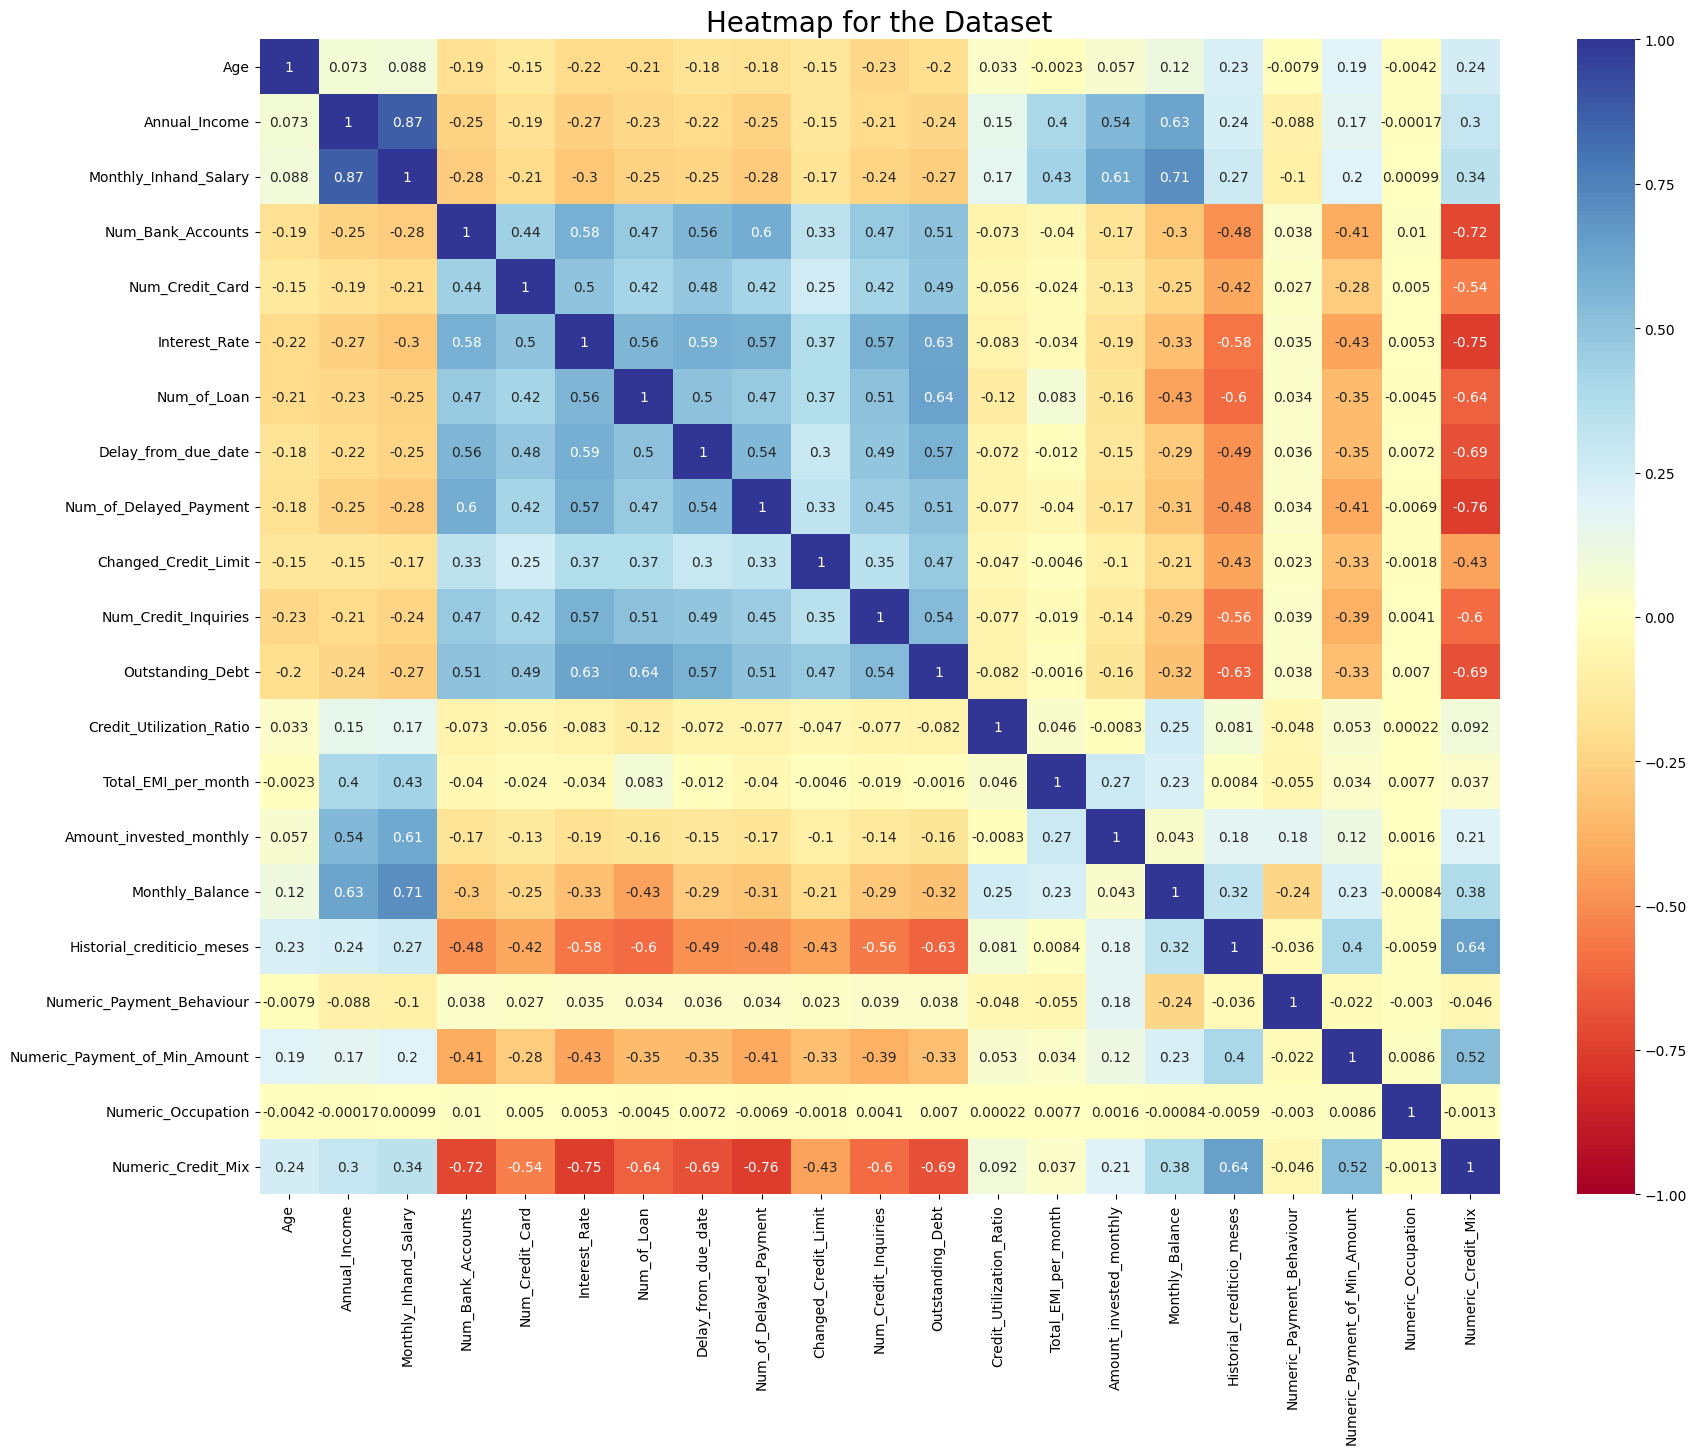

In [ ]:
#Hagamos un HeatMap del df
plt.rcParams['figure.figsize'] = (20, 15)

sns.heatmap(creditos.corr(), annot = True, cmap = 'RdYlBu',vmin=-1,vmax=1)
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

Se puede Observar que el campo 'Numeric_Occupation' no posee ninguna correlación con ningún campo, por lo que se puede suponer que no aporta información relevante.

En el caso de 'Numeric_Credit_Mix' se puede observar que posee correlación con variaos campos, pero al momento de a de moeneto se rehizo analisis gráficos los cuales no mostraban información muy reveladora por lo que se opto no incluirlos en el informe.

Como era de esperarse, se puede observar que hay una fuerte correlación líneal entre 'Monthly_Inhand_Salary' y 'Annual_Income'.

Se procede a realizar un gráfico de dispersión para poder observar su relación.

(0.0, 255000.0)

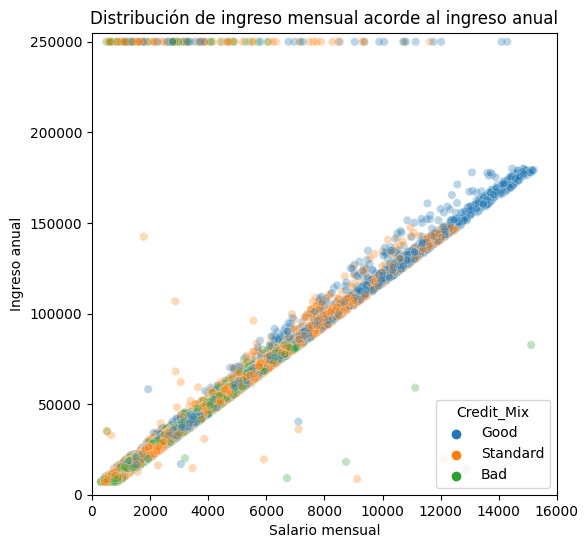

In [ ]:
#Crear el lienzo
fig, ax=plt.subplots(figsize=(6,6))

#Gáfico
sns.scatterplot(x='Monthly_Inhand_Salary', y = 'Annual_Income', data = creditos,hue='Credit_Mix',alpha=0.3)

#Título y nombre de los ejes
plt.xlabel("Salario mensual")
plt.ylabel("Ingreso anual")
plt.title("Distribución de ingreso mensual acorde al ingreso anual")

#Límites en el gráfico
plt.xlim(0,16000)
plt.ylim(0,255000)

En el gráfico se puede observar una tendencia lineal creciente, y unos valores aislados.

Se procede a buscar la ecuación de dicha correlación.

In [ ]:
#Se establece a 'Monthly_Inhand_Salary' como el valor independiente X y a 'Annual_Income'como el valor dependiente Y
X = creditos['Monthly_Inhand_Salary']
Y = creditos['Annual_Income']

# Se ajusta una curva polinómica (se opta por polinomio de grado 3)
degree = 3
coefficients = np.polyfit(X, Y, degree)

# Se crear la función polinómica a partir de los coeficientes
poly_function = np.poly1d(coefficients)
poly_function

poly1d([-5.68412085e-09,  1.11398682e-04,  1.12906096e+01,  3.70214504e+03])

Se pede observar que los valores de los coeficientes correspondientes al grado cúbico y cuadrado son muy pequeños por los que se los considera 0 y la ecuación quedaría representada por:

Y = 11.14 * X + 3702.15

De esta forma queda demostrade que el campo 'Annual_Income' posee una correlación con el campo 'Monthly_Inhand_Salary', y esta correlación posee causalidad. Por este motivo se podría eliminar el campo 'Annual_Income' ya que queda cubierto por el campo 'Monthly_Inhand_Salary'.

##Campos que no aportan información relevante
Luego de analizar los datos se observa que hay campos que no aportan información relevante, estos son 'Occupation', 'Annual_Income', 'Numeric_Occupation'.

In [ ]:
creditos.drop(['Occupation','Annual_Income','Numeric_Occupation'],axis=1,inplace=True)

##Se procede a responder
1. ¿Hay alguna relación entre el monto adeudado, el ingreso mensual y la clsificación del cliente?

/content


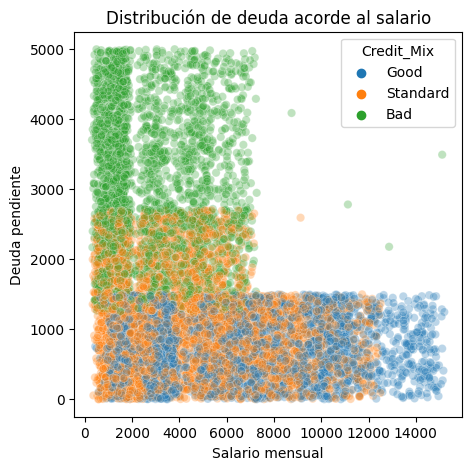

In [ ]:
# Crear el lienzo
fig, ax=plt.subplots(figsize=(5,5))

# Gáfico
sns.scatterplot(x='Monthly_Inhand_Salary', y = 'Outstanding_Debt', data = creditos,hue='Credit_Mix',alpha=0.3)

# Título y nombre de los ejes
plt.xlabel("Salario mensual")
plt.ylabel("Deuda pendiente")
plt.title("Distribución de deuda acorde al salario")

# Se guarda el gráfico en la PC
plt.savefig('C:\\Users\\Cristina\\Desktop\\Nari\\DeudaVssalario.jpg', format='jpg')
print(os.getcwd())

Se puede observar que los clientes que estan clasificados como malos poseen una deuda mayor igual a 1500 USD y a su vez no suelen tener ingresos mayor a 7000 USD mensuales.

Los clientes que que estan clasificados como buenos clientes son aquellos que no adeudan más de 1600USD y su salario puede llegar a los 15000 USD.

Los clientes clasificados como Standard son aquellos que alcanzan a poseer una deuda de hasta 2800 USD y sus salarios pueden llegar hasta los 12200 USD.

##Se procede a responder

2. ¿Existe alguna relación entre el comportamiento de pago, el ingreso mensual y la deuda pendiente?

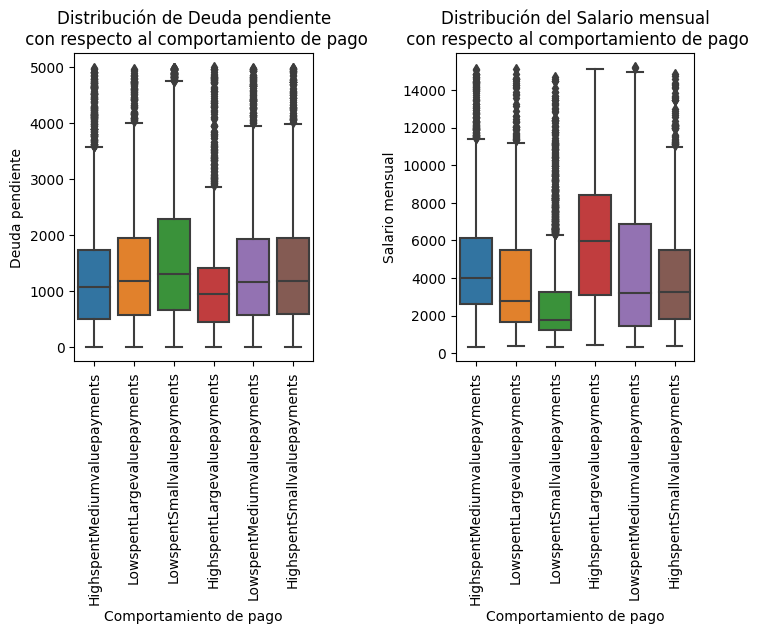

<Figure size 2000x1500 with 0 Axes>

In [ ]:
# Crear un lienzo y los subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),gridspec_kw={'wspace': 0.6})

# Realizar los gráficos de boxplot
sns.boxplot(ax=axes[0],x=creditos['Payment_Behaviour'], y=creditos['Outstanding_Debt'])
sns.boxplot(ax=axes[1],x=creditos['Payment_Behaviour'], y=creditos['Monthly_Inhand_Salary'])

# Ajustar las etiquetas del eje x en forma vertical
axes[0].tick_params(axis='x', rotation=90)
axes[1].tick_params(axis='x', rotation=90)

#Título y nombre de los ejes
axes[0].set_title("Distribución de Deuda pendiente\n con respecto al comportamiento de pago")
axes[0].set_xlabel("Comportamiento de pago")
axes[0].set_ylabel("Deuda pendiente")
axes[1].set_title("Distribución del Salario mensual\n con respecto al comportamiento de pago")
axes[1].set_xlabel("Comportamiento de pago")
axes[1].set_ylabel("Salario mensual")

# Mostrar los gráficos
plt.show()

# Se guarda el gráfico en la PC
plt.savefig('C:\\Users\\Cristina\\Desktop\\Nari\\Varios.jpg', format='jpg')

Se observa que los clientes que más gastan y realizan grandes pagos son aquellos que suelen tener mejores salarios y poseen una deuda pendiente menor.
En el caso de los cliente que realizan pocos gastos y realizan pagos bajos son aquellos que poseen un sueldo menor y una deuda pendiente mayor.

##Se procede a responder

3. ¿Existe una relación entre la cantidad de demoras de pago y el cambio del límite de crédito?

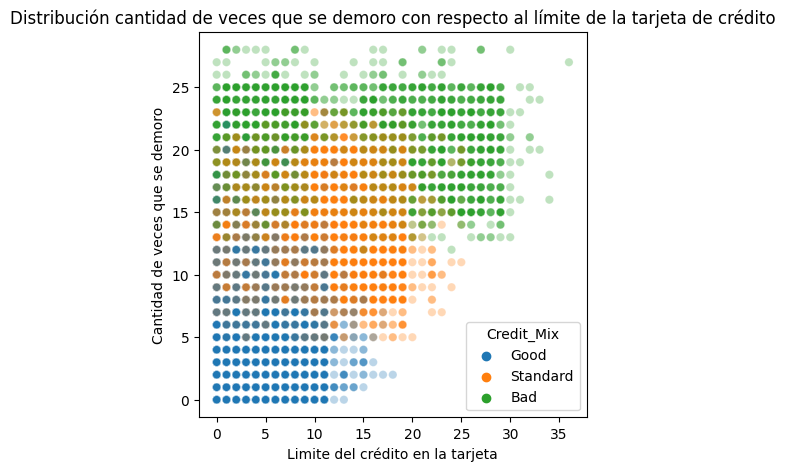

In [ ]:
#Crear lienzo
fig, ax=plt.subplots(figsize=(5,5))

#Gráfico
sns.scatterplot(x='Changed_Credit_Limit', y = 'Num_of_Delayed_Payment', data = creditos,alpha=0.3,hue='Credit_Mix')

#Título y nombre de los ejes
plt.xlabel("Limite del crédito en la tarjeta")
plt.ylabel("Cantidad de veces que se demoro")
plt.title("Distribución cantidad de veces que se demoro con respecto al límite de la tarjeta de crédito")

# Se guarda el gráfico en la PC
plt.savefig('C:\\Users\\Cristina\\Desktop\\Nari\\DemoraVslímtarjetacredito.jpg', format='jpg')

Se puede observar que a partir del limite de crédito es mayor al 17% el número de días demora mínimos va aumentando.
Se puede observar que la mayoría de los clientes que se han demorado menos de 8 ocasiones son aquellos que son considerados clientes buenos para la solicitud de un crédito. A su vez, se observa que la mayoría de los cliente con un cambio en el límite crediticio igual o mayor al 20% o que se han demorado más de 20 ocasiones en pagar son considerados malos clientes para la otorgación de un crédito.

##Se procede a responder

4. ¿Se puede afirmar que los clientes más aptos para créditos tienen mejor interes crediticio?

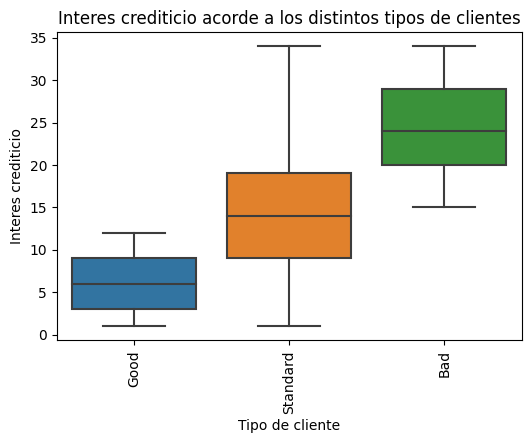

In [ ]:
# Crear un lienzo y los subplots
fig, axe = plt.subplots(figsize=(6, 4))

# Realizar los gráficos de boxplot
sns.boxplot(x=creditos['Credit_Mix'], y=creditos['Interest_Rate'])

# Ajustar las etiquetas del eje x en forma vertical
axe.tick_params(axis='x', rotation=90)

#Título y nombre de los ejes
axe.set_title("Interes crediticio acorde a los distintos tipos de clientes")
axe.set_xlabel("Tipo de cliente")
axe.set_ylabel("Interes crediticio")

# Se guarda el gráfico en la PC
plt.savefig('C:\\Users\\Cristina\\Desktop\\Nari\\InterescrediticioVsaptitud.jpg', format='jpg')

Se observa que los que se consideran buenos clientes poseen un interes menor igual al 12,5%. Y que, los que se consideran malos clientes poseen un interés crediticio mayor igual al 15%.